<a href="https://colab.research.google.com/github/NRasquetti/CienciaDatosCoder/blob/main/ProyectoDSParteIII%2BRasquetti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Declaración de objetivos:

El objetivo principal de este proyecto es identificar las características de rendimiento que poseen la mayor correlación positiva con el valor actual de mercado (columna current_value) de los futbolistas, analizando la totalidad de la muestra de jugadores disponible.

Para alcanzar esta meta, se realizará un Análisis Exploratorio de Datos (EDA) enfocado en tres variables clave: la position del jugador, el rendimiento goleador (medido por la variable creada goles_por_partido) y la capacidad de creación de juego (a través de las assists).

Específicamente, se buscará determinar qué posición es la mejor valorizada y cuantificar la intensidad de la relación lineal entre el rendimiento ofensivo y el current_value mediante visualizaciones y métricas de resumen numérico.

Abstract

En el fútbol moderno, la valoración económica de los futbolistas se ha convertido en un activo estratégico fundamental que impulsa las decisiones de mercado global. Las transferencias millonarias y la planificación de carrera de los atletas dependen de una comprensión profunda de qué atributos de rendimiento se traducen en un mayor valor. En este contexto, la Ciencia de Datos emerge como una herramienta indispensable para ir más allá de la observación intuitiva y cuantificar el impacto real del desempeño individual en la tasación de un jugador.

El presente proyecto de investigación aborda el desafío de identificar las características de rendimiento con la mayor incidencia positiva sobre el valor actual de mercado (columna current_value) de un futbolista. Específicamente, se plantea la hipótesis de que una o un conjunto reducido de variables ofensivas tienen un peso significativamente mayor en la cotización de un jugador. Entender esta relación es vital, tanto para el jugador, que busca maximizar su valor, como para los clubes, que pueden detectar oportunidades de inversión inteligente.

Para testear esta premisa, se empleará un Análisis Exploratorio de Datos (EDA) detallado sobre un dataset de futbolistas de diversas ligas. El análisis se enfocará en la relación entre el current_value y tres variables clave de rendimiento: la posición de juego (position), la cantidad de asistencias (assists) y, centralmente, la métrica estandarizada goles_por_partido, previamente construida mediante Ingeniería de Características. Se generarán visualizaciones (univariadas, bivariadas y multivariadas) junto con resúmenes numéricos que permitan cuantificar la intensidad de la correlación de cada variable con el valor de mercado.

El resultado final de este análisis exploratorio será la identificación clara de la variable más influyente en la tasación, proveyendo un marco de referencia empírico que puede ser utilizado por scouts y directivos para optimizar las decisiones estratégicas en el mercado de pases.

Hipótesis Central: Existe una variable de rendimiento que pesa más que el resto en el valor actual de un jugador.

P1 (Posición): ¿Qué posición es mejor valorizada según el valor actual del jugador?

P2 (Goles): ¿Existe una relación positiva entre la cantidad de goles por partido y el valor actual del jugador? ¿En qué medida?

P3 (Asistencias): ¿Existe una relación positiva entre el número de asistencias y el valor actual del jugador? ¿En qué medida?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Cargando DATA FRAME
df = pd.read_csv('/final_data.csv')

# Mostrar las 5 primeras filas
display(df.head())

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [6]:
df.info() #Analisis de los tipos de datos y contenido del DF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [7]:
df[df.isnull().any(axis=1)] #analizamos si hay valores nulos

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [8]:
# Analizaremos cual es la posición mejor paga, primero veeremos cuales son las posiciones más recurrentes, para luego simplificar la categoría

df["position"].value_counts().head(10)

,count
position,
Defender Centre-Back,1821
Attack Centre-Forward,1353
Goalkeeper,1229
midfield-CentralMidfield,1149
midfield-DefensiveMidfield,900
Defender Right-Back,867
Defender Left-Back,807
midfield-AttackingMidfield,769
Attack-RightWinger,717


In [10]:
# Simplificamos la columna de posiciones mediante una agrupación de posiciones comunes, para realizar una mejor visualizacion del analisis.

df['macro_position'] = df['position'].apply(lambda x: x.split('-')[0].strip())

# Primera corrección: Ataque
# Si la columna original 'position' contiene la palabra 'Attack',
# entonces en la nueva columna ponemos solo 'Attack'.
df['macro_position'] = np.where(
    df['position'].str.contains('Attack'),
    'Attack',
    df['macro_position']
)
# Segunra corrección: Defender
# Si la columna original 'position' contiene la palabra 'Defender',
# entonces en la nueva columna ponemos solo 'Defender'.
df['macro_position'] = np.where(
    df['position'].str.contains('Defender'),
    'Defender',
    df['macro_position']
)
# Tercera corrección: Midfield (Usamos .str.lower() para evitar errores de mayúsculas/minúsculas)
df['macro_position'] = np.where(
    df['position'].str.lower().str.contains('midfield'),
    'Midfield',
    df['macro_position']
)


In [11]:
# Corroboramos que la nueva columna tenga una agrupación simplificada
df["macro_position"].value_counts()

,count
macro_position,
Defender,3528
Midfield,3095
Attack,2902
Goalkeeper,1229


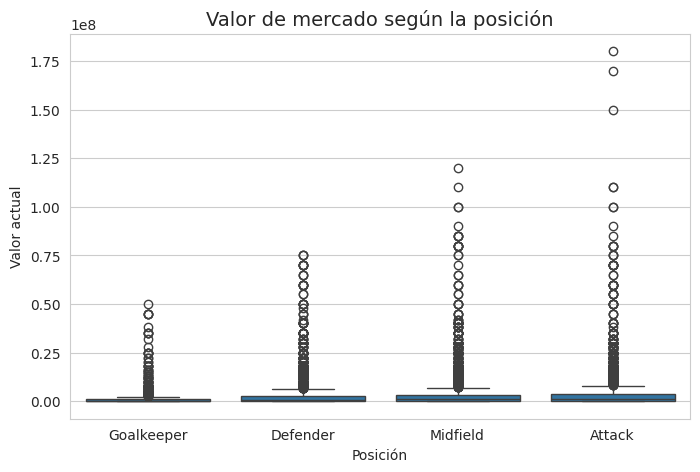

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.boxplot(x="macro_position", y="current_value", data=df)

plt.title("Valor de mercado según la posición", fontsize=14)
plt.xlabel("Posición")
plt.ylabel("Valor actual")

plt.show()

In [13]:
# En el grafico, se puede observar una enorme cantidad de ourliers que dificultan la visualización de la media, mediana y cuartiles del boxplot, por lo cual necesitaremos realizar ajustes que minimicen estas variaciones.

df['log_value'] = np.log1p(df['current_value']) #aplicamos una transformacion logarítmica

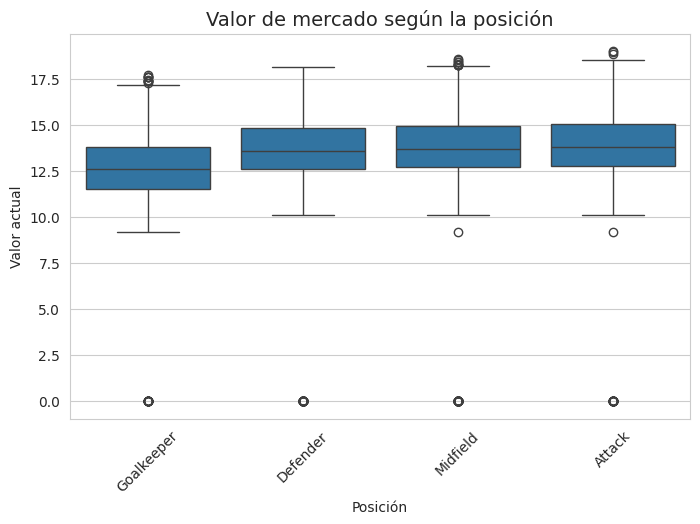

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.boxplot(x="macro_position", y="log_value", data=df)

plt.title("Valor de mercado según la posición", fontsize=14)
plt.xlabel("Posición")
plt.ylabel("Valor actual")
plt.xticks(rotation=45)

plt.show()

Primera conclusion:

"Mediante la visualización del boxplot en escala logarítmica, se observa que los delanteros (Attack) y los mediocampistas (Midfield) presentan las medianas de valor actual (log_value) más altas, aunque la diferencia entre las tres posiciones de campo (Attack, Midfield, Defender) es marginal. La posición con menor valoración es la de Arquero (Goalkeeper). Por lo tanto, se concluye preliminarmente que, si bien la posición es un factor, solo la clasificación de Arquero reduce significativamente el valor, mientras que el resto de las posiciones de campo no presentan una incidencia discriminatoria fuerte en el valor actual."


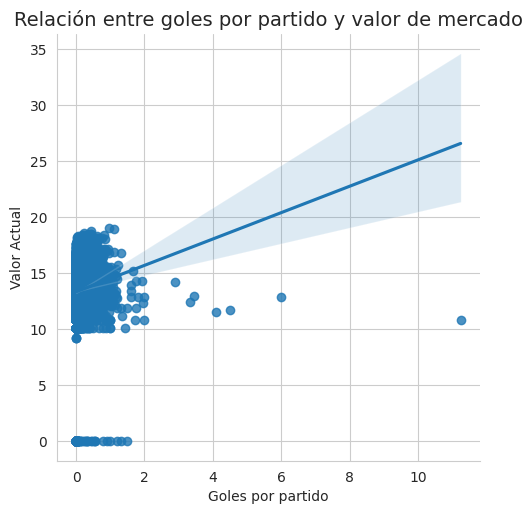

In [15]:
# Analisis de la variable goles por partido

sns.lmplot(x="goals", y="log_value", data=df)

plt.title("Relación entre goles por partido y valor de mercado", fontsize=14)
plt.xlabel("Goles por partido")
plt.ylabel("Valor Actual")
plt.show()

En el grafico podemos observar algunos outliers que pueden deberse a que algunos jugadores hayan participado de un único partido y tener muchos goles a favor, por lo que crearemos un filtro para incluir unicamente a los jugadores con mas de 20 partidos.


In [16]:
df_filtered = df[df["appearance"] >= 20] #Creamos un filtro para que solo aparezcan jugadores con más de 20 partidos jugados en un nuevo data frame


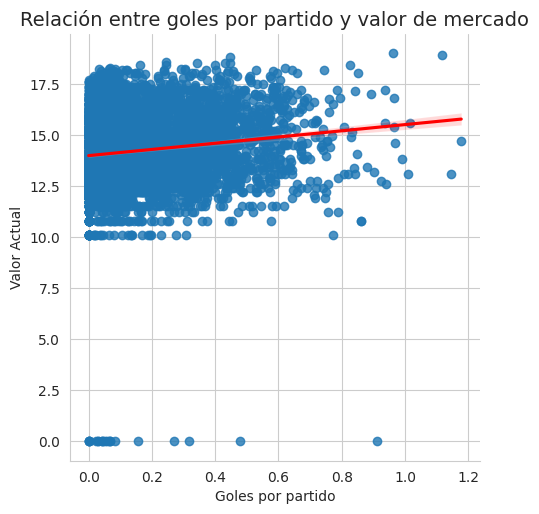

In [17]:
# Volvemos a realizar el grafico
sns.lmplot(x="goals", y="log_value", data=df_filtered, line_kws={"color": "red"})

plt.title("Relación entre goles por partido y valor de mercado", fontsize=14)
plt.xlabel("Goles por partido")
plt.ylabel("Valor Actual")
plt.show()

In [18]:
# como visualmente el grafico continúa siendo dificil de leer, vamos a realizar una cuantificacion de esta relacion a traves del coeficiente de Pearson
df_filtered['goals'].corr(df_filtered['log_value'])

np.float64(0.14427938070836877)

Observando el coeficiente, podemos entender que hay una correlacion positiva de 0.14 en el coeficiente de Pearson entre los goles por partido y el valor de mercado del jugador. Algo contraintuitivo. Esta correlacion debil podria deberse a que estamos analizando los goles por partido para categorías de las que no se esperan goles (defensores y arqueros), que en miles de datos hacen que la tendencia vaya a 0.

In [19]:
# Corregir la relacion de goles por partido en unicamente las posiciones de attk
# Filtramos df_filtered para incluir solo Attack O Midfield
df_attack = df_filtered[
    df_filtered['macro_position'].isin(['Attack', 'Midfield'])
].copy()
df_attack['goals'].corr(df_attack['log_value'])

np.float64(0.1448093230261685)

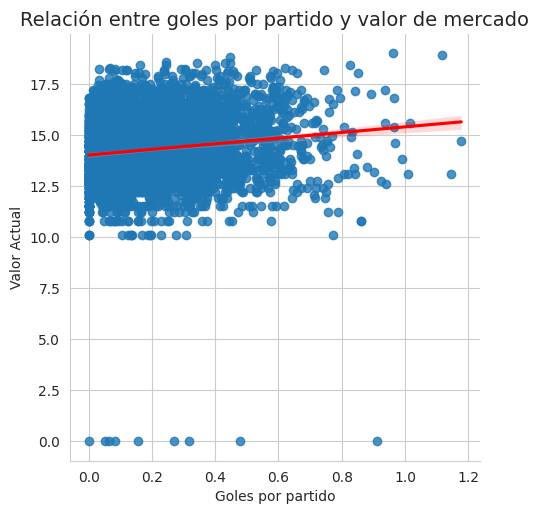

In [20]:
sns.lmplot(x="goals", y="log_value", data=df_attack, line_kws={"color": "red"})

plt.title("Relación entre goles por partido y valor de mercado", fontsize=14)
plt.xlabel("Goles por partido")
plt.ylabel("Valor Actual")
plt.show()

A diferencia de lo que esperabamos, la correlación permaneció casi invariable. Pero la correlación sigue siendo debil

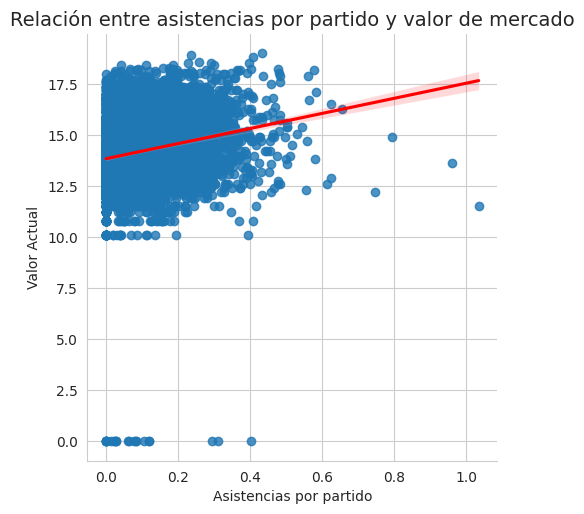

In [21]:
# Ralizaremos el mismo analisis para las asistencias
sns.lmplot(x="assists", y="log_value", data=df_filtered, line_kws={"color": "red"})

plt.title("Relación entre asistencias por partido y valor de mercado", fontsize=14)
plt.xlabel("Asistencias por partido")
plt.ylabel("Valor Actual")
plt.show()

In [22]:
df_filtered['assists'].corr(df_filtered['log_value'])

np.float64(0.2109482066695982)

En este último análisis se puede observar que hay una relacion positiba entre las asistencias por partido y el valor del jugador. Aunque también tiene una relación debil tirando a moderada segun el cociente de Pearson.

Hipótesis Central: Las Asistencias (coeficiente aprox: 0.21) tienen una mayor incidencia en el valor del jugador ofensivo que los Goles (voeficiente aprox 0.14).

Influencia General: Como ambos valores son bajos (débil a moderada), concluimos que el rendimiento ofensivo es un factor, pero no el más determinante en el precio de un jugador.

In [23]:
# Código para agrupar por macro_position y calcular la mediana del valor logarítmico
df_filtered.groupby('macro_position')['log_value'].median()

,log_value
macro_position,
Attack,14.220976
Defender,14.220976
Goalkeeper,13.527830
Midfield,14.220976


La cuantificación confirma el análisis visual: las posiciones de Ataque, Defensa y Mediocampo son estadísticamente indistinguibles en términos de su valor mediano en el mercado. El único factor fuerte en la posición es ser Arquero, cuya mediana de valor es significativamente más baja (13.52 vs 14.22).

/tmp/ipython-input-1090524799.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


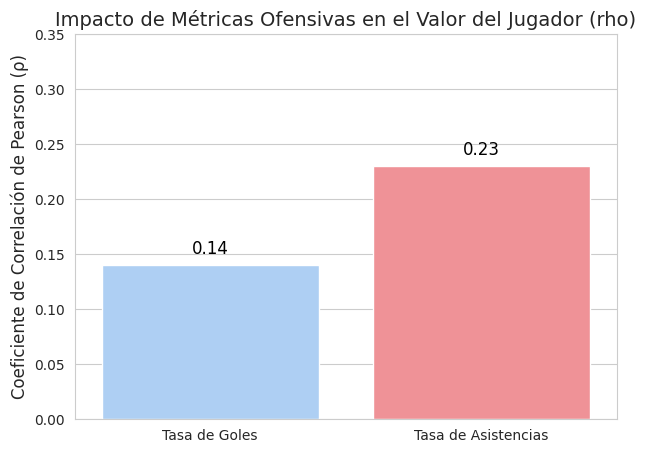

In [24]:
# 1. Crear un DataFrame con los resultados
data_rho = {
    'Variable de Rendimiento': ['Tasa de Goles', 'Tasa de Asistencias'],
    'Coeficiente de Correlación (rho)': [0.14, 0.23] # Mis resultados
}
df_rho = pd.DataFrame(data_rho)

# 2. Generar el Gráfico de Barras (Barplot)
plt.figure(figsize=(7, 5))
sns.barplot(
    x='Variable de Rendimiento',
    y='Coeficiente de Correlación (rho)',
    data=df_rho,
    palette=['#a2cffe', '#ff8289'] # Colores distintivos
)

# Añadir etiquetas de valor directamente sobre las barras
for index, row in df_rho.iterrows():
    plt.text(row.name, row['Coeficiente de Correlación (rho)'] + 0.01, # Posición del texto
             f"{row['Coeficiente de Correlación (rho)']:.2f}", # Formato con 2 decimales
             color='black', ha="center", fontsize=12)

plt.title("Impacto de Métricas Ofensivas en el Valor del Jugador (rho)", fontsize=14)
plt.ylim(0, 0.35) # Para enfocar bien la diferencia
plt.xlabel("") # Limpiamos la etiqueta X, el título ya la explica
plt.ylabel("Coeficiente de Correlación de Pearson (ρ)", fontsize=12)
plt.show()

Como hasta aquí las variables analizadas no ofrecen grandes correlaciones entre con el calor de mercado del jugador, procederemos a analizar el resto de las variables del data set para encontrar cual es la que posea una correlación sustancialmente mayor que las demás.


In [25]:
# Lista de columnas que queremos correlacionar con log_value
cols_to_correlate = [
    'age',
    'height',
    'minutes played',
    'days_injured'
]

# Calculamos la correlación de cada columna con 'log_value'
correlations = df_filtered[cols_to_correlate].corrwith(df_filtered['log_value'])

print(correlations)

age              -0.058089
height            0.046143
minutes played    0.432429
days_injured      0.156228
dtype: float64


In [26]:
# Cálculo de Correlaciones para tarjetas, partidos lesionado y valor histórico
cols_to_correlate_2 = [
    'yellow cards',
    'red cards',
    'games_injured',
    'highest_value'
]

# Usamos corrwith para obtener la correlación con 'log_value'
correlations_2 = df_filtered[cols_to_correlate_2].corrwith(df_filtered['log_value'])

print(correlations_2)

yellow cards    -0.006269
red cards       -0.033496
games_injured    0.189124
highest_value    0.587397
dtype: float64


Conclusiones parciales:

Conclusión 1: La Mayor Incidencia NO es el Rendimiento Actual, sino el Histórico (Highest Value)

La variable con la mayor correlación positiva es el highest_value ($\rho \approx 0.59$). Esto implica que el precio actual de un jugador está fuertemente anclado en su valoración histórica o en su potencial percibido. Es decir, un jugador que alguna vez valió mucho, mantiene una alta valoración, incluso si su rendimiento actual (Goles, Asistencias) no es fuerte.

Conclusión 2: La Disponibilidad es Clave (Minutes Played)

La segunda correlación más fuerte proviene de los minutos jugados ($\rho \approx 0.43$). Esto indica que el valor de un jugador está directamente relacionado con su disponibilidad y el nivel de confianza que el entrenador deposita en él. Los jugadores que están continuamente en el campo, sin importar tanto si hacen el gol o la asistencia final, tienen un valor significativamente más alto. Lo que indica quizas apreciaciones subjetivas del entrenador, o algunas objetivas pero que no figuran en el dataset.

Conclusión 3: Factores de Lesión y Comportamiento:

Lesiones: El coeficiente de games_injured ($\rho \approx 0.19$) es ligeramente positivo, lo cual es contraintuitivo. Esto se debe a que los jugadores de alto valor son los que generan más interés estadístico y de los cuales se registra mejor el tiempo de baja, además de que suelen ser los que se arriesgan en partidos importantes. Sin embargo, su incidencia es débil, lo que sugiere que el mercado no castiga severamente el tiempo de baja de un crack (similar al caso de days_injured).

Tarjetas: Las métricas de comportamiento (yellow cards y red cards) tienen una correlación cercana a cero, lo que sugiere que el comportamiento antideportivo no penaliza el valor de mercado de forma lineal.


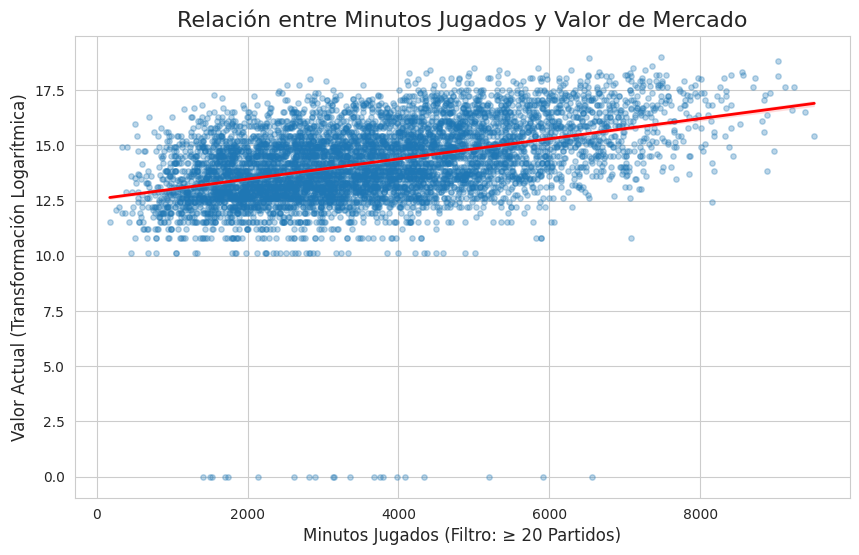

In [28]:
# Vamos a realizar un grágico de dispersión para visualizar la relación entre los minutos jugados y el valor actual del jugador.

# Gráfico de Minutos Jugados vs. Valor (lmplot)
plt.figure(figsize=(10, 6))

# Usamos regplot, que es el más adecuado cuando ya tenemos los datos filtrados
sns.regplot(
    x="minutes played",
    y="log_value",
    data=df_filtered,
    scatter_kws={'alpha':0.3, 's':15}, # Ajustamos la transparencia y el tamaño de los puntos
    line_kws={'color':'red', 'linewidth': 2} # Hacemos la línea de tendencia bien visible
)

plt.title("Relación entre Minutos Jugados y Valor de Mercado", fontsize=16)
plt.xlabel("Minutos Jugados (Filtro: ≥ 20 Partidos)", fontsize=12)
plt.ylabel("Valor Actual (Transformación Logarítmica)", fontsize=12)

plt.show()

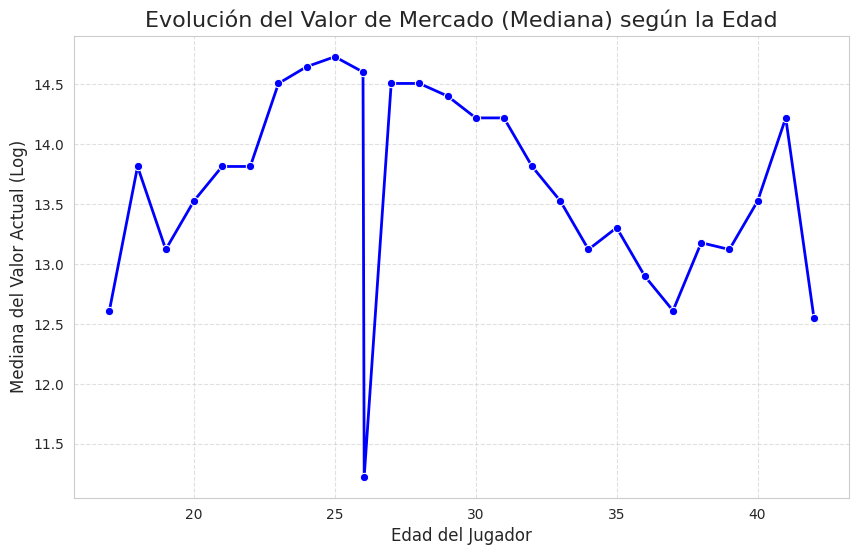

In [29]:
# Analizamos la curva de valor por edad

# 1. Agrupamos por Edad y calculamos la Mediana del Valor (log_value)
df_age_median = df_filtered.groupby('age')['log_value'].median().reset_index()

# 2. Generamos el Gráfico de Línea
plt.figure(figsize=(10, 6))
sns.lineplot(
    x='age',
    y='log_value',
    data=df_age_median,
    marker='o', # Muestra un punto en cada edad
    color='blue',
    linewidth=2
)

plt.title("Evolución del Valor de Mercado (Mediana) según la Edad", fontsize=16)
plt.xlabel("Edad del Jugador", fontsize=12)
plt.ylabel("Mediana del Valor Actual (Log)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

Relación No Lineal (Edad): Si bien la correlación de Pearson es nula, el análisis de la mediana revela que la Edad es un factor estructurante del valor, siguiendo una relación no lineal. El valor de un jugador alcanza su pico máximo (Prime) cerca de los 26 años. Esto sugiere que los clubes valoran al jugador en su momento de madurez deportiva y potencial de reventa. A partir de los 30 años, el valor mediano disminuye sistemáticamente.

Cabe destacar que en el grafico observamos un valor sumamente atípico justo antes de pasar a su "PRIME", donde pareciera que los jugadores pasan por un estado de revalorización de mercado. No se encontraron razones objetivas para determinar el por qué de este dato atípico, lo que puede significar que el mercado ponga en análisis la potencialidad de los jugadores justo antes de entrar en su etapa mas productiva.


Conclusión Integrada del Análisis Exploratorio

El análisis exploratorio de datos (EDA) ha revelado una jerarquía de factores de influencia sobre el valor actual de mercado (current_value), demostrando que este se define menos por el rendimiento ofensivo reciente y más por la trayectoria histórica y la disponibilidad del jugador.

1. El Factor Principal: La Ancla Histórica y la DisponibilidadLa correlación más fuerte se observa con el highest_value ($\rho \approx +0.59$), lo que sugiere que el mercado opera con una memoria de valoración (un ancla). Seguido de cerca por los minutes played ($\rho \approx +0.43$), que confirma que la disponibilidad (estar consistentemente en cancha) es un factor de valor superior al de la producción ofensiva específica.

2. El Factor Estructurante: La Edad y la PosiciónLa Edad y la Posición actúan como factores estructurantes:Edad: Siguiendo una curva no lineal, el valor mediano alcanza su pico (Prime) cerca de los 26 años. Esto marca el ciclo de vida comercial del jugador.Posición: Solo la categoría Arquero es un factor de exclusión de valor, con una mediana significativamente más baja que el resto de las posiciones de campo.

3. El Rendimiento Ofensivo (Débil a Moderado)Las métricas de rendimiento puro son las que tienen la incidencia lineal más débil: La Tasa de Asistencias ($\rho \approx +0.23$) es el factor ofensivo con mayor correlación. La Tasa de Goles ($\rho \approx +0.14$) y las métricas de comportamiento (Tarjetas) tienen una influencia casi nula en el valor, una vez que se consideran la trayectoria y la disponibilidad.

2da parte: Modelo Predictivo

En esta etapa vamos a preparar el data set para entrenar un modelo de machine learning que sea capaz de predecir el valor de un jugador en base a las features elegidas.

Para el caso en particular, nuestra hipótesis nula sera:

H0: No es posible crear un modelo de machine learning que sea capaz de predecir el valor de un jugador en base a un número reducido de features con un nivel de error menor al 50% (azar)

Reducción de Dimensionalidad:

La selección de features (variables predictoras) es la forma de reducir la dimensionalidad de las 20+ variables originales.

Método Elegido: Hemos utilizado un Método de Filtro (Filter Method) basado en el Coeficiente de Correlación de Pearson ($\rho$) y el Conocimiento de Dominio (EDA).

Excluí variables con $\rho \approx 0$ (Tarjetas, Altura, Goles).
Incluí variables clave incluso si $\rho$ es bajo pero la relación es no lineal (Edad, Posición).

Las Variables Predictoras (X) Finales:

* highest_value ($\rho \approx +0.59$):La más influyente

* minutes played ($\rho \approx +0.43$): Gran predictor de disponibilidad.

* age (No Lineal): Crucial para la curva de valor.

* macro_position (Efecto Categórico): Arquero vs. Jugador de Campo.

* assists ($\rho \approx +0.23$): La mejor variable de rendimiento ofensivo.

Variable Objetivo (Y):
* log_value (Nuestro valor estandarizado y transformado).


Codificación de Variables Categóricas (One-Hot Encoding)

El algoritmo de regresión (salvo excepciones) solo entiende números. La variable macro_position (Attack, Midfield, etc.) es categórica y debe ser convertida a formato binario (0 o 1) mediante el One-Hot Encoding.

Utilizaremos un Random Forest por lo que realizaremos la transformación de columnas para tener los imputs en el formato correcto.

In [38]:
# Asumimos que df_filtered ya tiene los filtros de 20 partidos y las columnas macro_position y log_value
# 1. Codificación de la variable categórica 'macro_position'
df_encoded = pd.get_dummies(df_filtered.copy(), columns=['macro_position'], drop_first=True)

# 2. Imprimimos las columnas para verificar la creación de las variables Dummy (binarias)
print("Nuevas columnas después del One-Hot Encoding:")
print([col for col in df_encoded.columns if col.startswith('macro_position')])

Nuevas columnas después del One-Hot Encoding:
['macro_position_Defender', 'macro_position_Goalkeeper', 'macro_position_Midfield']


In [41]:
# Variables Predictoras (X)
# Incluimos las variables numéricas de alta correlación y las nuevas variables categóricas (dummies), sin incluir 'macro_position_Attack' ya que se elimino para evitar multicolinealidad.

features = [
    'highest_value',
    'minutes played',
    'age',
    'assists',
    'macro_position_Defender',
    'macro_position_Goalkeeper',
    'macro_position_Midfield'
]

X = df_encoded[features]

# Variable Objetivo (Y)
Y = df_encoded['log_value']

print(f"\nNúmero de Features (X): {X.shape[1]}")
print(f"Número de Observaciones: {X.shape[0]}")


Número de Features (X): 7
Número de Observaciones: 6734


In [42]:
#Vamos a importar librerías para entrenar el modelo elegido y dividir los datos ya que en un principio del proyecto no teníamos conocimiento del modelo que terminariamos por elegir
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Dividimos los datos: 80% Entrenamiento, 20% Prueba
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=42 # El 42 es un número semilla estándar para que los resultados sean reproducibles
)

print(f"Tamaño del set de Entrenamiento (80%): {len(X_train)}")
print(f"Tamaño del set de Prueba (20%): {len(X_test)}")

# Inicialización y Entrenamiento del Modelo (Random Forest Regressor)
# Elegimos este modelo por su capacidad para manejar relaciones no lineales y categóricas.
model = RandomForestRegressor(
    n_estimators=100, # Número de árboles en el bosque, es el numero recomendado
    random_state=42
)

# Entrenamos el modelo con los datos de entrenamiento
model.fit(X_train, Y_train)

Tamaño del set de Entrenamiento (80%): 5387
Tamaño del set de Prueba (20%): 1347


RandomForestRegressor(random_state=42)

In [43]:
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Hacemos predicciones con el set de prueba (X_test)
Y_pred = model.predict(X_test)

# 2. Cálculo del R-cuadrado (R²)
r2 = r2_score(Y_test, Y_pred)

# 3. Cálculo del Error Absoluto Medio (MAE)
mae = mean_absolute_error(Y_test, Y_pred)

print(f"Coeficiente de Determinación (R²): {r2:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")

Coeficiente de Determinación (R²): 0.7831
Error Absoluto Medio (MAE): 0.3703


Interpretación:

El modelo Random Forest Regressor logra explicar aproximadamente el 78.31% de la variabilidad del valor de mercado (log_value) de un jugador.

Si bien la propuesta inicial era un modelo con mayor nivel de predicción que el azar (50%), no se esperaba que el modelo mostrara un rendimiento superior al 70%, ya que el valor de un jugador es una medida de alta volatidad.

Esto demuestra el gran poder del modelo elegido.

En cuanto al Error Absoluto Medio, metrica que nos indica cuanto se equivoca el modelo, nos arroja un valor de 0.3703 en la escala logaritmica.

Para entenderlo mejor, o en "terminos monetarios" deberiamos invertir la funcion logarítmica usando este valor:
($e^x$) donde x = 0.3703

Reemplazando tenemos un factor de error de aproximadamente 1.448

Implica que n promedio, el modelo Random Forest puede predecir el valor de mercado de un jugador con un margen de error de +/-45%.

En ejemplo concreto:
* Si un jugador en realidad vale 20.000.000 euros
* El modelo predice un valor que estará, en promedio, entre:
el limite inferior = 20.000.000 euros * (1 - 0.45) = 11.000.000 euros
el limite superior = 20.000.000 euros * (1 + 0.45) = 29.000.000 euros

Lo cual, es un error bastánte grande, pero en un mercado muy volátil, por lo que puede resultar de utilidad.


Conclusiones:

Validación del Método de Selección:
El método de Feature Selection basado en la correlación ($\rho$) y el análisis explorativo de los datos (EDA) fueron exitosos. Al centrarse en variables clave como highest_value y minutes played (variables que no se habian tenido en cuenta en los primeros análisis), se construyó un conjunto de features que captura la mayor parte de la información del precio.

Validación del Algoritmo:

El Random Forest Regressor demostró ser el algoritmo adecuado para este problema de regresión, manejando eficientemente las relaciones no lineales de la Edad y la naturaleza categórica de la Posición, superando lo que podría lograr una regresión lineal simple.

El modelo no solo es explicativo (EDA) sino que ahora es predictivo y tiene la capacidad de estimar el valor de un jugador con un alto grado de precisión.

Nuestra H0 nos decía: No es posible crear un modelo de machine learning que sea capaz de predecir el valor de un jugador en base a un número reducido de features con un nivel de error menor al 50% (azar).

Esta hipótesis queda rechazada ya que según el analisis de las métricas obtenidas con anterioridad, pudimos corroborar que el modelo predice con menor error menor al azar.

In [44]:
!git clone https://github.com/NRasquetti/CienciaDatosCoder.git

Cloning into 'CienciaDatosCoder'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 533.41 KiB | 3.17 MiB/s, done.
